In [15]:
import h5py
import numpy as np
def image():

    data=h5py.File('datasets/trainset.hdf5','r')
    X_train=np.array(data["X_train"][:])
    y_train=np.array(data["Y_train"][:])

    deta=h5py.File('datasets/testset.hdf5','r')
    X_test=np.array(deta["X_test"][:])
    y_test=np.array(deta["Y_test"][:])
    return X_train ,y_train,X_test ,y_test

In [16]:
import numpy as np
import matplotlib.pyplot as plt 

  
from utilities import *


X_train, y_train, X_test, y_test = load_data()
#print(X_train.shape)
#print(y_train.shape)
print(np.unique(y_train, return_counts=True))

#print(X_test.shape)
#print(y_test.shape)
print(np.unique(y_test, return_counts=True))


(array([0., 1.]), array([500, 500], dtype=int64))
(array([0., 1.]), array([100, 100], dtype=int64))


C:\Users\HOME\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


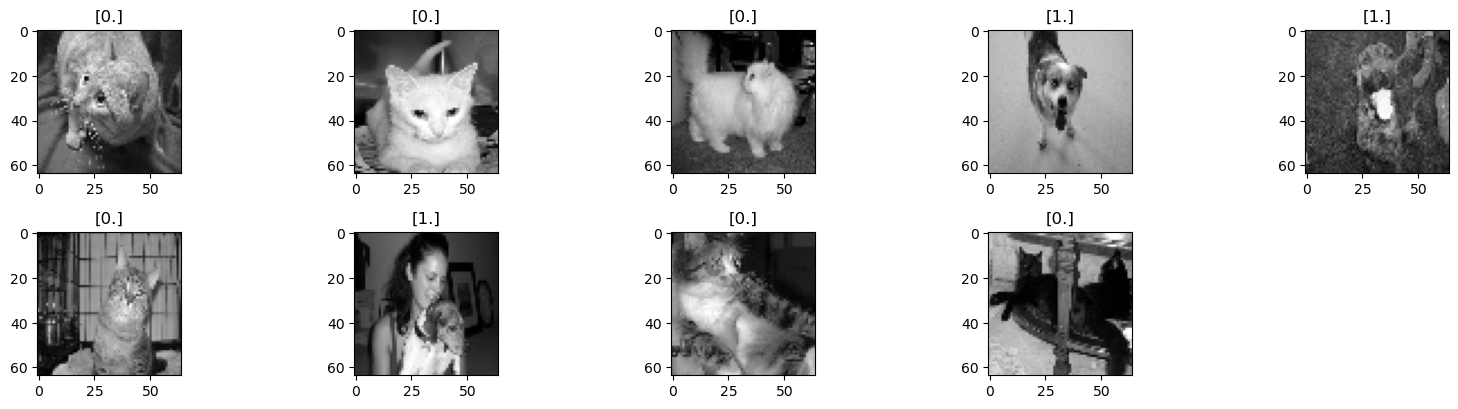

(4096, 1000)
(4096, 200)


In [17]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()


X_train_reshape =X_train.reshape(X_train.shape[0],-1)/X_train.max()
X_test_reshape =X_test.reshape(X_test.shape[0],-1)/X_train.max()
X_train_reshape=X_train_reshape.T
X_test_reshape=X_test_reshape.T
y_train=y_train.T


X_train_reshape=X_train_reshape[:,:1000]
y_train=y_train[:,:1000]
y_train = y_train.ravel()
print(X_train_reshape.shape)
print(X_test_reshape.shape) 

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
print(X_train_reshape)

[[0.64566929 0.16535433 0.10629921 ... 0.18503937 0.99212598 0.48031496]
 [0.68503937 0.16929134 0.1023622  ... 0.26771654 0.99212598 0.49606299]
 [0.64173228 0.15354331 0.11417323 ... 0.55905512 0.99212598 0.51181102]
 ...
 [0.34251969 0.21653543 0.53149606 ... 0.79527559 0.2519685  0.63385827]
 [0.70866142 0.20472441 0.55511811 ... 0.79527559 0.25984252 0.62992126]
 [0.15354331 0.21653543 0.47637795 ... 0.7992126  0.23228346 0.62992126]]


In [20]:
lr=LogisticRegression()
lr.fit(X_train_reshape.T,y_train.T)

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
lr.predict(X_train_reshape.T)

array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1.

In [22]:
from sklearn.metrics import classification_report
y_pred=lr.predict(X_test_reshape.T)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.61      0.58       100
         1.0       0.56      0.50      0.53       100

    accuracy                           0.56       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.56      0.56      0.55       200



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Créer un modèle de forêt aléatoire
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rf_classifier.fit(X_train_reshape.T, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_rf = rf_classifier.predict(X_test_reshape.T)

# Afficher le rapport de classification
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60       100
         1.0       0.60      0.56      0.58       100

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.59      0.59      0.59       200



In [45]:
import h5py
import numpy as np
def image():

    X_train=h5py.File('images.h5','r')
    
  
    return X_train

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
image= image()
# Créer un modèle de forêt aléatoire
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rf_classifier.fit(X_train_reshape.T, y_train)

lr.predict(image)


ValueError: Expected 2D array, got 1D array instead:
array=['1.jpg'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.